In [1]:
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import cma

def load_results_dict(dir, filename):
    with open(dir+'/'+filename, 'rb') as f:
        results = pkl.load(f)
    return results

multitask = False
dir = 'heterogeneity_results_MG'
filenames = {
    'ddn': {
        'distributed': {
            'cluster': '2025-04-24_DDN_dist_decay_per_cluster.p',
            'network': '2025-04-24_DDN_dist_decay_net_wide.p',
        },
        'fixed': {
            'cluster': '2025-04-24_DDN_fixed_decay_per_cluster.p',
            'network': '2025-04-24_DDN_fixed_decay_net_wide.p',
        }
    },
    'esn': {
        'distributed': {
            'cluster': '2025-04-24_BL_dist_decay_per_cluster.p',
            'network': '2025-04-29_BL_dist_decay_net_wide.p',
        },
        'fixed': {
            'cluster': '2025-04-24_BL_fixed_decay_per_cluster.p',
            'network': '2025-04-24_BL_fixed_decay_net_wide.p',
        }
    }
    # 'fixed_ddn': {
    #     'distributed': {
    #         'cluster': '2025-02-15_single_task_exp_DDN_dist_decay_per_cluster_fixed_delays.p',
    #         'network': '2025-02-15_single_task_exp_DDN_dist_decay_net_wide_fixed_delays.p',
    #     },
    #     'fixed':{
    #         'cluster': '2025-02-15_single_task_exp_DDN_fixed_decay_per_cluster_fixed_delays.p',
    #         'network': '2025-03-19_single_task_exp_DDN_fixed_decay_net_wide_fixed_delays.p'
    #     }
    # }
}

In [2]:
results_dicts = {}
for factor_1 in filenames:
    results_dicts[factor_1] = {}
    for factor_2 in filenames[factor_1]:
        results_dicts[factor_1][factor_2] = {}
        for factor_3 in filenames[factor_1][factor_2]:
            print('loading: ' + filenames[factor_1][factor_2][factor_3])
            results_dicts[factor_1][factor_2][factor_3] = load_results_dict(dir, filenames[factor_1][factor_2][factor_3])

loading: 2025-04-24_DDN_dist_decay_per_cluster.p
loading: 2025-04-24_DDN_dist_decay_net_wide.p
loading: 2025-04-24_DDN_fixed_decay_per_cluster.p
loading: 2025-04-24_DDN_fixed_decay_net_wide.p
loading: 2025-04-24_BL_dist_decay_per_cluster.p
loading: 2025-04-29_BL_dist_decay_net_wide.p
loading: 2025-04-24_BL_fixed_decay_per_cluster.p
loading: 2025-04-24_BL_fixed_decay_net_wide.p


In [3]:
# dict keys example
print(results_dicts['esn']['distributed']['cluster'].keys())

dict_keys(['validation performance', 'parameters', 'evolutionary strategy', 'cma stds', 'error margin', 'number of sequences', 'number of samples', 'alpha grid', 'tau range', 'start value range', 'example net'])


In [4]:
def get_validation_throughout_evolution(dict, gen_max, populations=False):
    # Validation scores are saved in a matrix with dimensions:
    # generations x hyperparameter candidates x re-initializations
    all_scores = dict['validation performance'][:gen_max, :, :]

    # from the re-initializations from the same hyperparameter set/candidate, we take the average
    best_candidate_scores = np.mean(all_scores, axis=-1)

    # from the population of hyperparameter candidates, we select the best candidate
    best_gen_scores = np.max(best_candidate_scores, axis=-1)
    return best_gen_scores

gen_max = 180
val_scores = {}
for factor_1 in results_dicts:
    val_scores[factor_1] = {}
    for factor_2 in results_dicts[factor_1]:
        val_scores[factor_1][factor_2] = {}
        for factor_3 in results_dicts[factor_1][factor_2]:
            print(factor_3)
            val_scores[factor_1][factor_2][factor_3] = get_validation_throughout_evolution(results_dicts[factor_1][factor_2][factor_3], gen_max)

cluster
network
cluster
network
cluster
network
cluster
network


## Performance throughout evolution

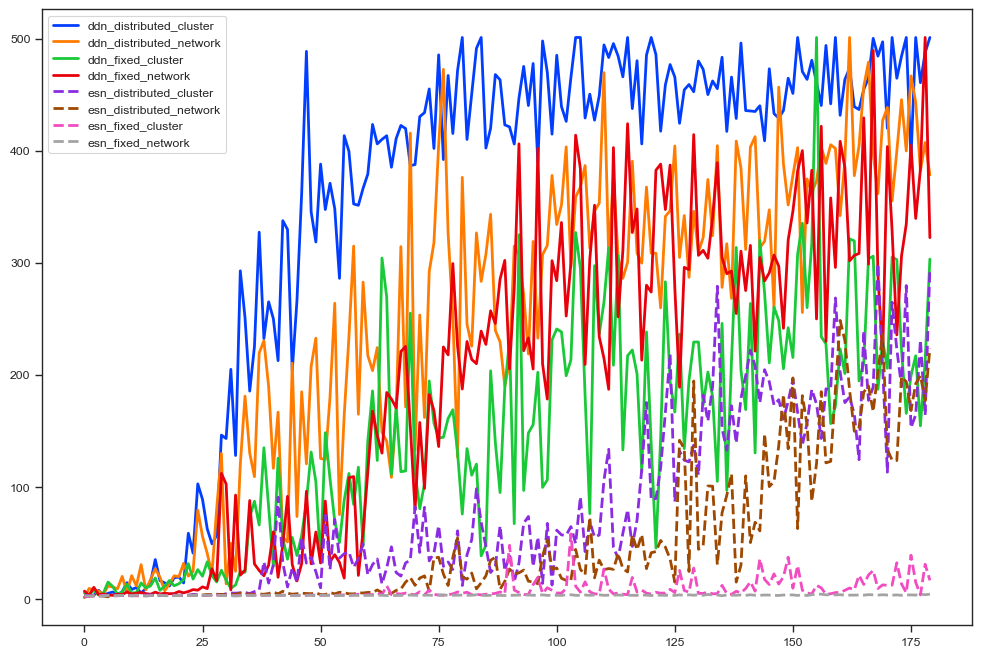

In [5]:
sns.set_theme(style="ticks", font_scale=1, palette='bright', context='paper')

plt.figure(figsize=(12,8))
gen_start = 0
gen_end = gen_max
for factor_1 in val_scores:
    for factor_2 in val_scores[factor_1]:
        for factor_3 in val_scores[factor_1][factor_2]:
            line = '-'
            if factor_1 == 'esn':
                line = '--'
            elif factor_1 == 'fixed_ddn':
                line = ':'
            plt.plot(val_scores[factor_1][factor_2][factor_3][gen_start:gen_end], label=factor_1 + '_' + factor_2 + '_' + factor_3, linestyle=line, linewidth=2)

# plt.ylim(0, .4)
plt.legend()

## Summary best models

In [ ]:
def get_best():